#Boosting Assignment

Q1. What is Boosting in Machine Learning? Explain how it improves weak learners.
  - Boosting is an ensemble learning technique that combines multiple weak learners (usually shallow decision trees) in a sequential manner to build a strong predictive model. The key idea is that each new model focuses more on the mistakes (misclassified samples or high error points) made by the previous models. This step-by-step correction improves overall performance.
  It starts with a weak model trained on the dataset. Errors are identified, and higher weights are given to misclassified samples. A new weak learner is trained on this updated distribution. Final prediction is made by combining the weighted outputs of all learners.

Q2. What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?
  - AdaBoost:
  Focuses on misclassified samples by adjusting weights of data points. Each new weak learner is trained on reweighted data to correct previous errors. Combines learners through weighted majority voting (classification) or weighted sum (regression).
  Gradient Boosting:
  Focuses on minimizing the loss function directly using gradient descent. Each new weak learner fits the residual errors (negative gradients) of the previous model. Combines learners additively to minimize overall prediction error.

Q3. How does regularization help in XGBoost?
  - Regularization in XGBoost helps prevent overfitting and improves generalization by penalizing complex models. L1 Regularization (Lasso penalty): Shrinks less important feature weights to zero, encouraging sparsity in the model. L2 Regularization (Ridge penalty): Prevents excessively large weights, ensuring stability in predictions. Helps control tree complexity by limiting depth, number of leaves, and weight magnitudes. Leads to a more robust model that performs well on unseen data.

Q4. Why is CatBoost considered efficient for handling categorical data?
  - CatBoost is specifically designed to handle categorical features efficiently without requiring extensive preprocessing (like one-hot encoding or label encoding). Uses a technique called ordered target statistics, which converts categorical values into numerical values based on target distributions while avoiding data leakage. Handles high-cardinality categorical variables smoothly without exploding feature space. Automatically deals with missing values in categorical columns. Reduces preprocessing time and risk of overfitting from improper encoding methods.

Q5. What are some real-world applications where boosting techniques are preferred over bagging methods?
  - Boosting techniques are often preferred in scenarios where high accuracy and complex decision boundaries are required. Some real-world applications include:
  Finance → Credit scoring, loan default prediction, fraud detection.Healthcare → Disease diagnosis, patient risk prediction.
  E-commerce → Recommendation systems, customer churn prediction.
  Marketing → Customer segmentation, response prediction for campaigns Cybersecurity → Intrusion detection, anomaly detection.    

In [1]:
# Q6. Write a Python program to:Train an AdaBoost Classifier on the Breast Cancer dataset, Print the model accuracy

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Load dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Train AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=100,
    random_state=42
)
model.fit(X_train, y_train)

# Evaluate accuracy
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print("Accuracy of AdaBoost Classifier :", acc)

Accuracy of AdaBoost Classifier : 0.9532163742690059


In [2]:
# Q7. Write a Python program to:Train a Gradient Boosting Regressor on the California Housing dataset,  Evaluate performance using R-squared score

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Load dataset
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Evaluate R-squared score
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("R-squared Score of Gradient Boosting Regressor :", r2)

R-squared Score of Gradient Boosting Regressor : 0.804992915650479


In [3]:
# Q8. Write a Python program to:Train an XGBoost Classifier on the Breast Cancer dataset,Tune the learning rate using GridSearchCV,best parameters.

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Load dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# XGBoost Classifier
from xgboost import XGBClassifier

# GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {
    "learning_rate": [0.01, 0.05, 0.1, 0.2]
}
xgb = XGBClassifier(
    n_estimators=200,
    max_depth=3,
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42
)

grid = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring="accuracy")
grid.fit(X_train, y_train)

# Best model evaluation
from sklearn.metrics import accuracy_score
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print("Best Parameters :", grid.best_params_)
print("Accuracy of XGBoost Classifier :", acc)


Best Parameters : {'learning_rate': 0.2}
Accuracy of XGBoost Classifier : 0.9649122807017544


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.2 MB/s eta 0:00:00


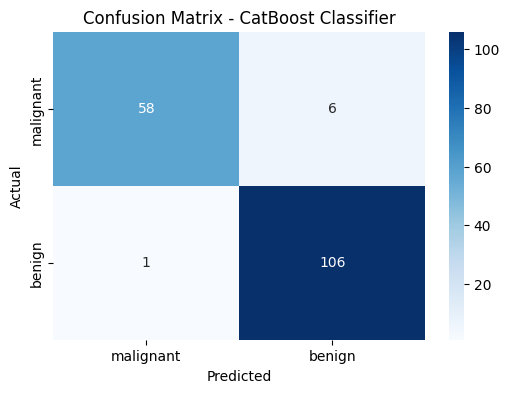

In [4]:
# Q9. Write a Python program to:Train a CatBoost Classifier, Plot the confusion matrix using seaborn.

!pip install catboost
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Load dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Train CatBoost Classifier
from catboost import CatBoostClassifier
cat = CatBoostClassifier(iterations=200, depth=4, learning_rate=0.1, verbose=0, random_state=42)
cat.fit(X_train, y_train)

# Predictions
y_pred = cat.predict(X_test)

# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CatBoost Classifier")
plt.show()


Q10. You're working for a FinTech company trying to predict loan default using customer demographics and transaction behavior. The dataset is imbalanced, contains missing values, and has both numeric and categorical features.
  - Data Preprocessing & Handling Missing/Categorical Values:
  I will impute missing numeric values using median and categorical values using mode.
  Categorical features will be encoded using CatBoost’s native handling or one-hot encoding.
  Outliers in numeric features will be capped to reduce skew.
  Choice between AdaBoost, XGBoost, or CatBoost:
  I prefer CatBoost because the dataset contains both numeric and categorical features.
  XGBoost can be used if numerical features dominate and GPU acceleration is available.
  AdaBoost is less suitable for imbalanced and categorical-heavy datasets.
  Hyperparameter Tuning Strategy:
  I will use GridSearchCV or RandomizedSearchCV to tune learning rate, number of estimators, max depth, and regularization.
  Early stopping will be applied to prevent overfitting.
  Evaluation Metrics and Why:
  ROC-AUC, F1-score, and Precision-Recall AUC are preferred because accuracy alone can be misleading.
  High recall is prioritized to correctly identify potential defaulters and reduce financial risk.
  Business Benefit:
  The model will flag high-risk customers early, helping reduce defaults.
  This improves credit decision-making, risk management, and profitability.


              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1047
           1       0.95      0.89      0.92       453

    accuracy                           0.95      1500
   macro avg       0.95      0.94      0.94      1500
weighted avg       0.95      0.95      0.95      1500



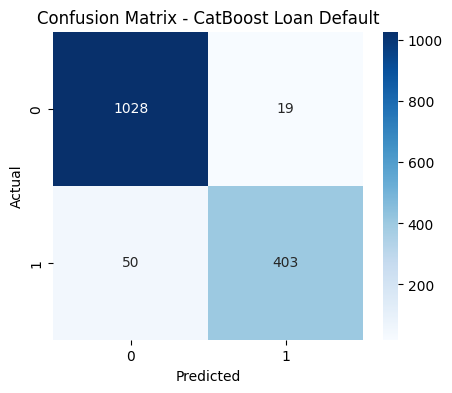

In [5]:
# answer python code

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Create synthetic imbalanced dataset for loan default
from sklearn.datasets import make_classification
X, y = make_classification(
    n_samples=5000, n_features=20, n_informative=10,
    n_redundant=5, n_classes=2, weights=[0.7, 0.3],
    random_state=42
)

# Split into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Handle missing values (simulate + fill)
X_train = pd.DataFrame(X_train).fillna(X_train.mean())
X_test = pd.DataFrame(X_test).fillna(X_test.mean())

# Install CatBoost if not already installed
!pip install catboost -q
from catboost import CatBoostClassifier

# Train CatBoost classifier
cat = CatBoostClassifier(
    iterations=300,
    depth=6,
    learning_rate=0.05,
    eval_metric="F1",
    verbose=0,
    random_state=42
)
cat.fit(X_train, y_train)

# Make predictions
y_pred = cat.predict(X_test)

# Evaluate model
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True, fmt="d", cmap="Blues"
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CatBoost Loan Default")
plt.show()